# Data Analysis: Start-ups, Investement & Funding

## Data Cleaning 
This file is used to clean the data, please review "funding_analysis.ipynb file" for the clean analysis.   

## Import of Libraries

In [183]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

Loading the CSV Data 

In [184]:
# Defining the file path 
file_path = "data_files/startup_growth_investment_data.csv"

# Loading the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

  Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
0    Startup_1  Blockchain               8             1.335166e+09   
1    Startup_2        SaaS               2             2.781498e+09   
2    Startup_3      EdTech              10             3.309032e+09   
3    Startup_4     Fintech               5             4.050196e+09   
4    Startup_5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4           192.00  


In [185]:
df.duplicated().sum()

0

In [186]:
# 🔹Unique values per column
print("\n Unique Values Per Column:")
print(df.nunique())

# 🔹Missing values per column
print("\n Missing (NaN) Values Per Column:")
print(df.isna().sum())

# 🔹 Summary statistics for numerical and categorical columns
print("\n Summary Statistics:")
print(df.describe(include="all"))

# 🔹 Data Overview (Structure, Data Types, Non-null Counts)
print("\n Data Overview:")
print(df.info())

# 🔹 First 5 Rows (Previewing the Data)
print("\n First 5 Rows:")
print(df.head())


 Unique Values Per Column:
Startup Name               5000
Industry                      8
Funding Rounds               10
Investment Amount (USD)    5000
Valuation (USD)            5000
Number of Investors          50
Country                      10
Year Founded                 24
Growth Rate (%)            4384
dtype: int64

 Missing (NaN) Values Per Column:
Startup Name               0
Industry                   0
Funding Rounds             0
Investment Amount (USD)    0
Valuation (USD)            0
Number of Investors        0
Country                    0
Year Founded               0
Growth Rate (%)            0
dtype: int64

 Summary Statistics:
       Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
count          5000        5000     5000.000000             5.000000e+03   
unique         5000           8             NaN                      NaN   
top       Startup_1  HealthTech             NaN                      NaN   
freq              1         685     

In [187]:
# 🔹 Print Data Types & Sample Values
print("\n Column Data Types & Example Values:")
for col in df.columns:
    print(f"\n📌 Column: {col}")
    print("   ▶ Data Type:", df[col].dtype)
    print("   ▶ Example Values:", df[col].dropna().unique()[:5])  # Show the first 5 unique values


 Column Data Types & Example Values:

📌 Column: Startup Name
   ▶ Data Type: object
   ▶ Example Values: ['Startup_1' 'Startup_2' 'Startup_3' 'Startup_4' 'Startup_5']

📌 Column: Industry
   ▶ Data Type: object
   ▶ Example Values: ['Blockchain' 'SaaS' 'EdTech' 'Fintech' 'HealthTech']

📌 Column: Funding Rounds
   ▶ Data Type: int64
   ▶ Example Values: [ 8  2 10  5  9]

📌 Column: Investment Amount (USD)
   ▶ Data Type: float64
   ▶ Example Values: [1.33516585e+09 2.78149822e+09 3.30903193e+09 4.05019627e+09
 1.64508029e+09]

📌 Column: Valuation (USD)
   ▶ Data Type: float64
   ▶ Example Values: [6.62144804e+09 8.36321410e+09 1.54826974e+10 1.26825279e+10
 6.88796594e+09]

📌 Column: Number of Investors
   ▶ Data Type: int64
   ▶ Example Values: [50 36 39 44 48]

📌 Column: Country
   ▶ Data Type: object
   ▶ Example Values: ['Germany' 'UK' 'Singapore' 'France' 'India']

📌 Column: Year Founded
   ▶ Data Type: int64
   ▶ Example Values: [2012 2006 2016 2021 2011]

📌 Column: Growth Rate (%)

In [188]:
# 🔹 Rename 'Startup Name' to 'Startup ID'
df.rename(columns={"Startup Name": "Startup ID"}, inplace=True)

# 🔹 Convert startup names into unique ID numbers
df["Startup ID"] = df["Startup ID"].factorize()[0] + 1  # Assigns unique numeric IDs starting from 1

# 🔹 Display updated data
print(df.head())  # Show first 5 rows to verify the change

# Save the cleaned dataset (optional)
df.to_csv("data_files/cleaned_startup_data.csv", index=False)

   Startup ID    Industry  Funding Rounds  Investment Amount (USD)  \
0           1  Blockchain               8             1.335166e+09   
1           2        SaaS               2             2.781498e+09   
2           3      EdTech              10             3.309032e+09   
3           4     Fintech               5             4.050196e+09   
4           5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4           192.00  


In [189]:
# Identify numeric columns (including integers and floats)
numeric_cols = df.select_dtypes(include=['number']).columns

# Round all numeric columns to 2 decimal places
df[numeric_cols] = df[numeric_cols].round(2)

# Show the updated DataFrame
print("\nData after rounding numeric columns to 2 decimal places:")
print(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('data_files/cleaned_data.csv', index=False)

print("\nData cleaned and saved in the folder data_files where you can find the cleaned_data.csv file")


Data after rounding numeric columns to 2 decimal places:
   Startup ID    Industry  Funding Rounds  Investment Amount (USD)  \
0           1  Blockchain               8             1.335166e+09   
1           2        SaaS               2             2.781498e+09   
2           3      EdTech              10             3.309032e+09   
3           4     Fintech               5             4.050196e+09   
4           5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4      

In [190]:
df = pd.read_csv('data_files/cleaned_data.csv')

In [191]:
# Now you can perform the operations you want with the loaded DataFrame
# For example, check the first few rows
# You can proceed with your calculations and analysis
print(df.head())

   Startup ID    Industry  Funding Rounds  Investment Amount (USD)  \
0           1  Blockchain               8             1.335166e+09   
1           2        SaaS               2             2.781498e+09   
2           3      EdTech              10             3.309032e+09   
3           4     Fintech               5             4.050196e+09   
4           5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4           192.00  


In [192]:
# Group by 'Industry' and calculate the average growth rate per industry
growth_by_industry = df.groupby('Industry')['Growth Rate (%)'].mean().reset_index()

# Sorting industries by average growth rate in descending order
growth_by_industry = growth_by_industry.sort_values(by='Growth Rate (%)', ascending=False)

# Displaying the industry with the highest growth rate
top_industry = growth_by_industry.iloc[0]

# Displaying the result
print(f"Industry with the highest growth rate: {top_industry['Industry']} with a growth rate of {top_industry['Growth Rate (%)']}%")
print("\nGrowth rate segmented by industry:")
print(growth_by_industry)

growth_by_industry.to_pickle("data_files/growth_by_industry.pkl")

Industry with the highest growth rate: EdTech with a growth rate of 105.20069306930694%

Growth rate segmented by industry:
     Industry  Growth Rate (%)
4      EdTech       105.200693
5     Fintech       105.163675
2  Blockchain       103.322821
7        SaaS       103.100980
3  E-commerce       101.501153
0          AI       100.726312
6  HealthTech       100.158599
1     Biotech        97.580912


In [193]:
# Group by 'Industry' and calculate the average growth rate per industry
Average_growth_by_industry = df.groupby('Industry')['Growth Rate (%)'].mean().reset_index()

# Display the average growth rate for each industry
print("Average Growth Rate Segmented by Industry:")
print(Average_growth_by_industry)

Average_growth_by_industry.to_pickle("data_files/Average_growth_Segmented_by_Industry.pkl")

Average Growth Rate Segmented by Industry:
     Industry  Growth Rate (%)
0          AI       100.726312
1     Biotech        97.580912
2  Blockchain       103.322821
3  E-commerce       101.501153
4      EdTech       105.200693
5     Fintech       105.163675
6  HealthTech       100.158599
7        SaaS       103.100980


In [194]:
# Group by industry to get total investment and valuation
industry_stats = df.groupby("Industry").agg(
    Total_Investment=("Investment Amount (USD)", "sum"),
    Total_Valuation=("Valuation (USD)", "sum")
).reset_index()

# Finding the industry with the most investment
top_invested_industry = industry_stats.loc[industry_stats["Total_Investment"].idxmax()]

# Finding the industry with the highest valuation
top_valued_industry = industry_stats.loc[industry_stats["Total_Valuation"].idxmax()]

# Grouping by country to get total investment
country_stats = df.groupby("Country").agg(
    Total_Investment=("Investment Amount (USD)", "sum")
).reset_index()

# Finding the country that invested the most
top_investing_country = country_stats.loc[country_stats["Total_Investment"].idxmax()]

# Printing results
print(f"📌 **Industry with the Most Investment:** {top_invested_industry['Industry']} (${top_invested_industry['Total_Investment']:,.0f})")
print(f"📌 **Industry with the Highest Valuation:** {top_valued_industry['Industry']} (${top_valued_industry['Total_Valuation']:,.0f})")
print(f"📌 **Country that Invested the Most:** {top_investing_country['Country']} (${top_investing_country['Total_Investment']:,.0f})")


📌 **Industry with the Most Investment:** HealthTech ($1,636,565,354,043)
📌 **Industry with the Highest Valuation:** E-commerce ($5,170,241,685,930)
📌 **Country that Invested the Most:** Australia ($1,328,810,042,738)


In [195]:
industry_stats = df.groupby("Industry").agg(
    Avg_Investment=("Investment Amount (USD)", "mean"),
    Avg_Valuation=("Valuation (USD)", "mean"),
    Total_Investment=("Investment Amount (USD)", "sum"),
    Total_Valuation=("Valuation (USD)", "sum"),
    Count=("Industry", "count")  # Number of investments per industry
).reset_index()

In [196]:
country_stats = df.groupby("Country").agg(
    Avg_Investment=("Investment Amount (USD)", "mean"),
    Avg_Valuation=("Valuation (USD)", "mean"),
    Total_Investment=("Investment Amount (USD)", "sum"),
    Total_Valuation=("Valuation (USD)", "sum"),
    Count=("Country", "count")  # Number of investments per country
).reset_index()


In [197]:
industry_stats["Investment_Segment"] = pd.qcut(
    industry_stats["Total_Investment"], q=3, labels=["Low", "Medium", "High"]
)

industry_stats["Valuation_Segment"] = pd.qcut(
    industry_stats["Total_Valuation"], q=3, labels=["Low", "Medium", "High"]
)

In [198]:
country_stats["Investment_Segment"] = pd.qcut(
    country_stats["Total_Investment"], q=3, labels=["Low", "Medium", "High"]
)

country_stats["Valuation_Segment"] = pd.qcut(
    country_stats["Total_Valuation"], q=3, labels=["Low", "Medium", "High"]
)

In [199]:
print("Industry Statistics:")
print(industry_stats.sort_values(by="Total_Investment", ascending=False))

print("\nCountry Statistics:")
print(country_stats.sort_values(by="Total_Investment", ascending=False))


Industry Statistics:
     Industry  Avg_Investment  Avg_Valuation  Total_Investment  \
6  HealthTech    2.389147e+09   7.466786e+09      1.636565e+12   
3  E-commerce    2.493989e+09   8.167838e+09      1.578695e+12   
7        SaaS    2.425936e+09   7.916092e+09      1.559877e+12   
5     Fintech    2.521915e+09   8.117729e+09      1.550977e+12   
2  Blockchain    2.464965e+09   7.946256e+09      1.538138e+12   
0          AI    2.454116e+09   8.212621e+09      1.477378e+12   
4      EdTech    2.437629e+09   7.938860e+09      1.477203e+12   
1     Biotech    2.464531e+09   8.064938e+09      1.459002e+12   

   Total_Valuation  Count Investment_Segment Valuation_Segment  
6     5.114749e+12    685               High              High  
3     5.170242e+12    633               High              High  
7     5.090047e+12    643               High              High  
5     4.992403e+12    615             Medium            Medium  
2     4.958464e+12    624             Medium            Med

In [200]:
# Save DataFrame to a Pickle file
df.to_pickle("data_files/investment_data.pkl")
print("Pickle file saved successfully!")

Pickle file saved successfully!


In [201]:
# Load the Pickle file
df_loaded = pd.read_pickle("data_files/investment_data.pkl")

# Display the loaded DataFrame
print(df_loaded.head())  # Show the first few rows

   Startup ID    Industry  Funding Rounds  Investment Amount (USD)  \
0           1  Blockchain               8             1.335166e+09   
1           2        SaaS               2             2.781498e+09   
2           3      EdTech              10             3.309032e+09   
3           4     Fintech               5             4.050196e+09   
4           5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4           192.00  


# Data Visualisations 

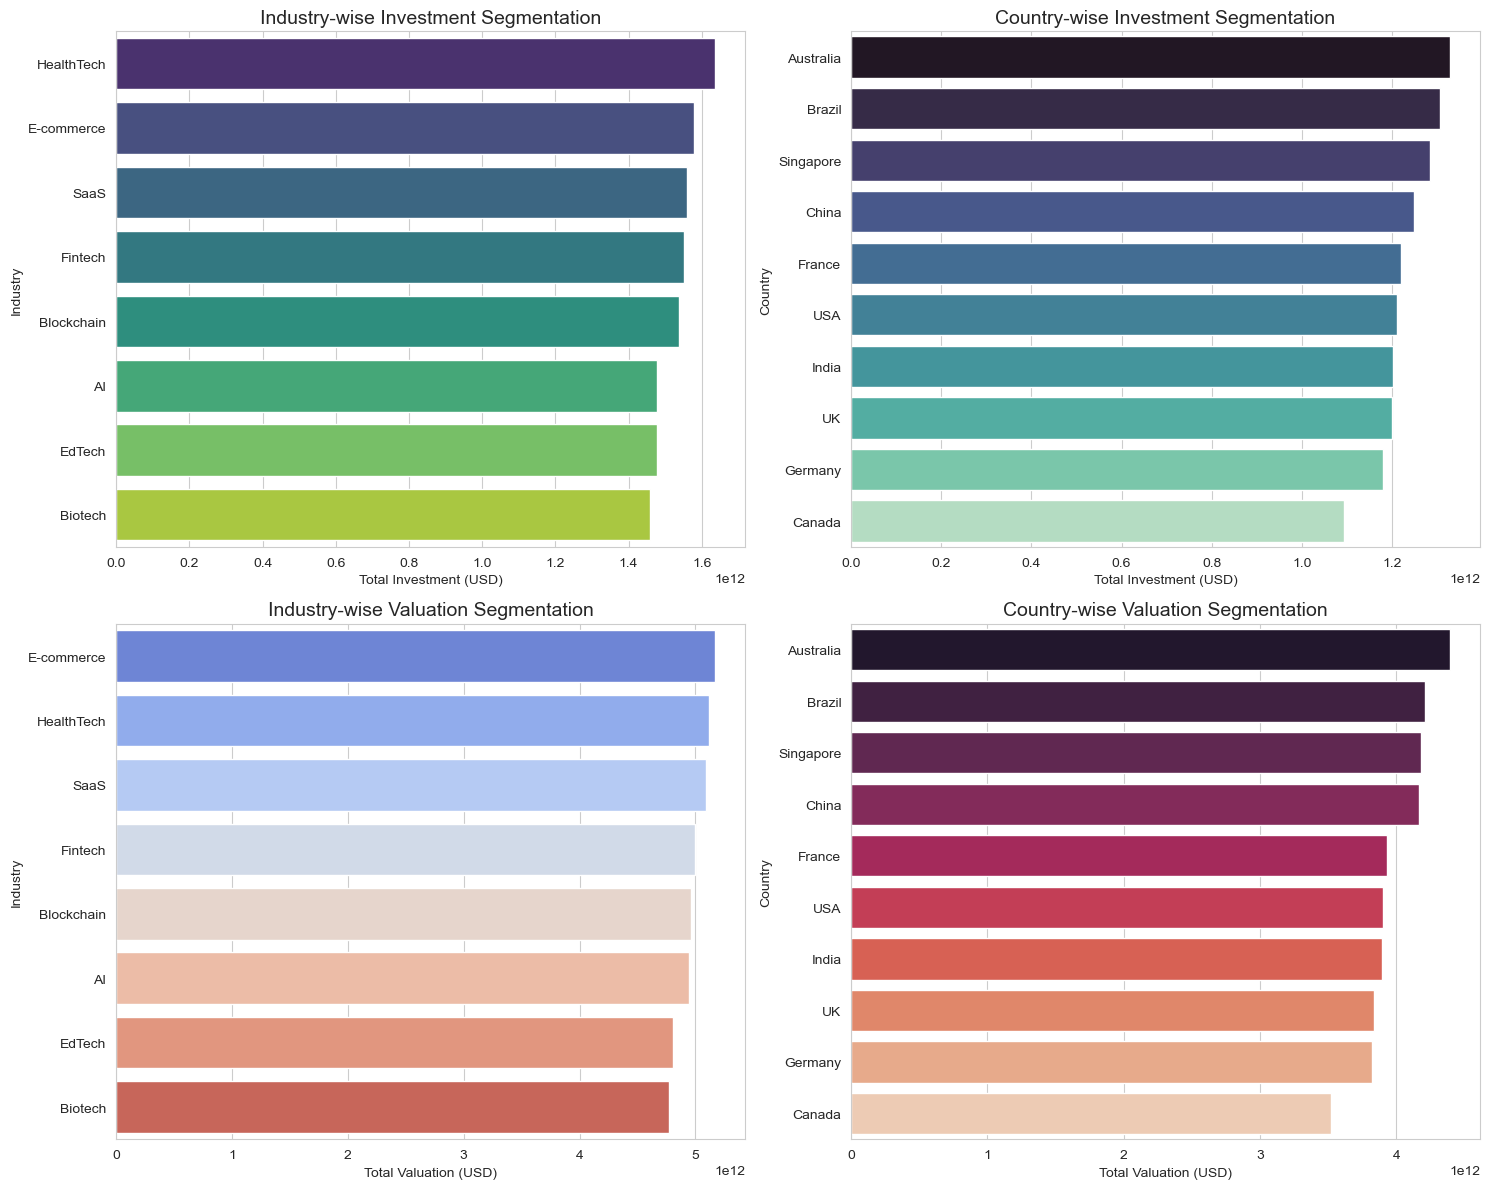

In [202]:
# Load your dataset from Pickle file
df = pd.read_pickle("data_files/investment_data.pkl")

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ---- 📊 Industry-wise Investment Segmentation ----
industry_investment = df.groupby("Industry")["Investment Amount (USD)"].sum().sort_values(ascending=False)
sns.barplot(x=industry_investment.values, y=industry_investment.index, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Industry-wise Investment Segmentation", fontsize=14)
axes[0, 0].set_xlabel("Total Investment (USD)")
axes[0, 0].set_ylabel("Industry")

# ---- 📊 Country-wise Investment Segmentation ----
country_investment = df.groupby("Country")["Investment Amount (USD)"].sum().sort_values(ascending=False)
sns.barplot(x=country_investment.values, y=country_investment.index, palette="mako", ax=axes[0, 1])
axes[0, 1].set_title("Country-wise Investment Segmentation", fontsize=14)
axes[0, 1].set_xlabel("Total Investment (USD)")
axes[0, 1].set_ylabel("Country")

# ---- 📊 Industry-wise Valuation Segmentation ----
industry_valuation = df.groupby("Industry")["Valuation (USD)"].sum().sort_values(ascending=False)
sns.barplot(x=industry_valuation.values, y=industry_valuation.index, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Industry-wise Valuation Segmentation", fontsize=14)
axes[1, 0].set_xlabel("Total Valuation (USD)")
axes[1, 0].set_ylabel("Industry")

# ---- 📊 Country-wise Valuation Segmentation ----
country_valuation = df.groupby("Country")["Valuation (USD)"].sum().sort_values(ascending=False)
sns.barplot(x=country_valuation.values, y=country_valuation.index, palette="rocket", ax=axes[1, 1])
axes[1, 1].set_title("Country-wise Valuation Segmentation", fontsize=14)
axes[1, 1].set_xlabel("Total Valuation (USD)")
axes[1, 1].set_ylabel("Country")

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig("data_visuals/investment_valuation_segmentation.png")
plt.show()

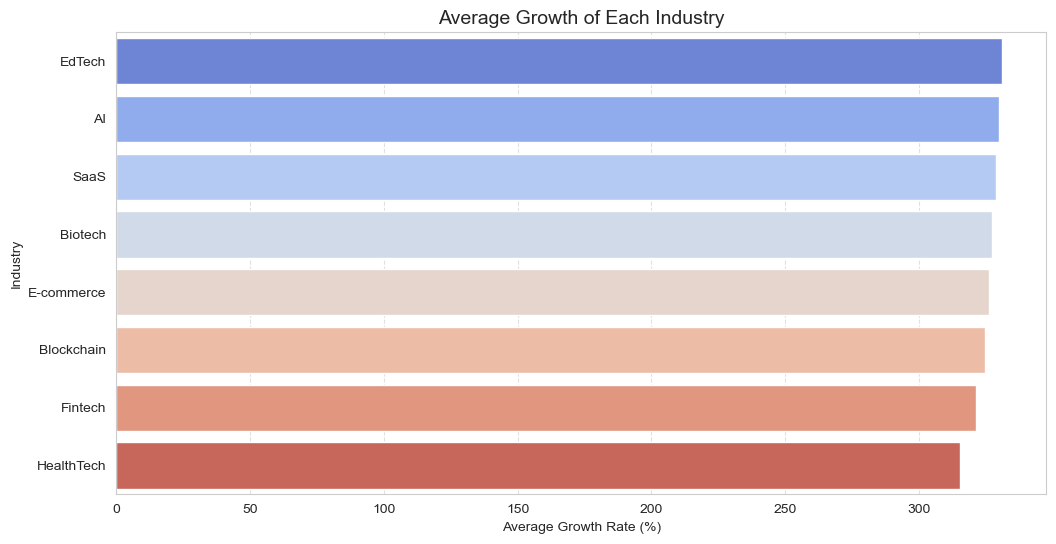

In [207]:
# Calculate average growth for each industry
df["Growth Rate"] = (df["Valuation (USD)"] / df["Investment Amount (USD)"]) * 100

# Group by industry and calculate the average growth
industry_growth = df.groupby("Industry")["Growth Rate"].mean().sort_values(ascending=False)

# Plot the average growth per industry
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_growth.values, y=industry_growth.index, palette="coolwarm")
plt.title("Average Growth of Each Industry", fontsize=14)
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Industry")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Saving the plot as an image file 
plt.savefig("data_visuals/industry_growth_rate.png")
# Show the plot
plt.show()

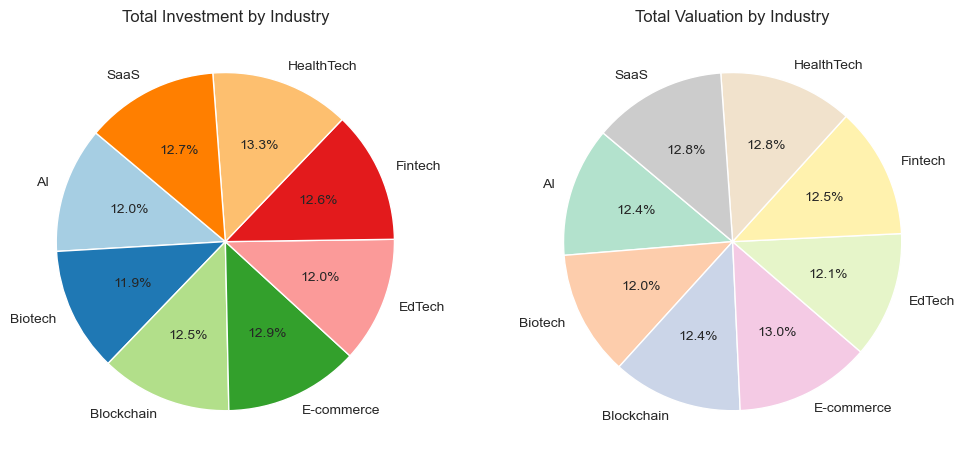

In [204]:
# Aggregate total investment and valuation by industry
industry_totals = df.groupby("Industry").agg(
    Total_Investment=("Investment Amount (USD)", "sum"),
    Total_Valuation=("Valuation (USD)", "sum")
)

# Plot pie chart for total investment by industry
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot
plt.pie(
    industry_totals["Total_Investment"], 
    labels=industry_totals.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Total Investment by Industry")

# Plot pie chart for total valuation by industry
plt.subplot(1, 2, 2)  # Second subplot
plt.pie(
    industry_totals["Total_Valuation"], 
    labels=industry_totals.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Pastel2.colors
)
plt.title("Total Valuation by Industry")

# Saving the plot as an image file
plt.savefig("data_visuals/industry_investment_valuation_pie_chart.png", bbox_inches='tight')
plt.show()

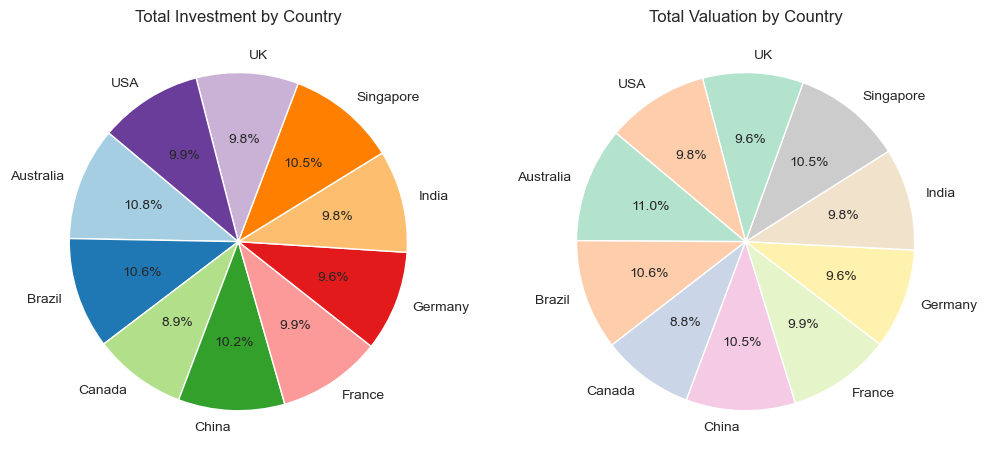

In [205]:
# Aggregate total investment and valuation by country
country_totals = df.groupby("Country").agg(
    Total_Investment=("Investment Amount (USD)", "sum"),
    Total_Valuation=("Valuation (USD)", "sum")
)

# Plot pie chart for total investment by country
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot
plt.pie(
    country_totals["Total_Investment"], 
    labels=country_totals.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Total Investment by Country")

# Plot pie chart for total valuation by country
plt.subplot(1, 2, 2)  # Second subplot
plt.pie(
    country_totals["Total_Valuation"], 
    labels=country_totals.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Pastel2.colors
)
plt.title("Total Valuation by Country")

# Saving the plot as an image file
plt.savefig("data_visuals/country_investment_Total_Valuation_Pie_Chart.png")
plt.show()

In [206]:
df.to_pickle("data_files/investment_data.pkl")